This code is my LSTM portion of the project. You may have to alter the dataset location to run on your machine. I created a shortcut to the shared drive and placed that in mydrive due to dataset size.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Final X_train shape: (160000, 50, 2)
Final X_test shape: (40000, 50, 2)
Final y_train shape: (160000, 2)
Final y_test shape: (40000, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0038 - mae: 0.0304 - val_loss: 1.0831e-04 - val_mae: 0.0093
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 1.6320e-05 - mae: 0.0030 - val_loss: 4.1192e-05 - val_mae: 0.0055
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 9.9796e-06 - mae: 0.0023 - val_loss: 4.6127e-05 - val_mae: 0.0058
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 8.8560e-06 - mae: 0.0021 - val_loss: 3.1392e-05 - val_mae: 0.0048
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 6.1142e-06 - mae: 0.0018 - val_loss: 2.9181e-05 - val_mae: 0.0041
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 5.5143e-06 - mae: 0.0016 - val_loss: 3.1783e-05 - val_mae: 0.0048
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 3.9198e-06 - mae: 0.0014 - val_loss: 1.6609e-05 - val_mae: 0.0033
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 3.2936e-06 - mae: 0.0013 - val

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 8.6174e-07 - mae: 6.8072e-04
Test Loss (MSE): 8.3639901049537e-07
Test MAE: 0.0006796743837185204


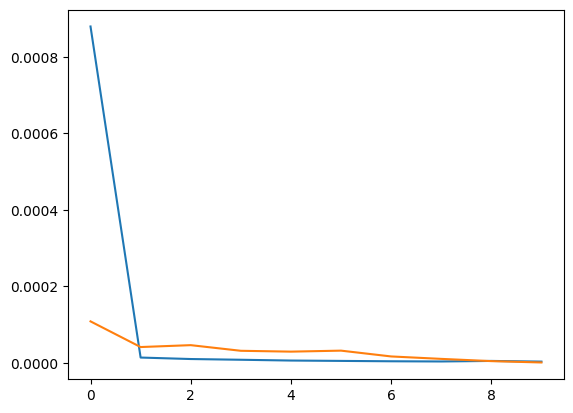

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 🔹 Step 1: Load Full Dataset
X = np.load("/content/drive/My Drive/X_sequences.npy")  # (9144129, 50, 2)
y = np.load("/content/drive/My Drive/y_targets.npy")    # (9144129, 2)

# 🔹 Step 2: Sample 200,000 Data Points Randomly (Preserving Shape)
sample_size = 200000
indices = np.random.permutation(len(X))[:sample_size]  # Randomized indices
X_sampled = X[indices]  # (200000, 50, 2)
y_sampled = y[indices]  # (200000, 2)

# 🔹 Step 3: Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# 🔹 Step 4: Verify Correct Shapes Before Saving
print("Final X_train shape:", X_train.shape)  # Expected: (160000, 50, 2)
print("Final X_test shape:", X_test.shape)    # Expected: (40000, 50, 2)
print("Final y_train shape:", y_train.shape)  # Expected: (160000, 2)
print("Final y_test shape:", y_test.shape)    # Expected: (40000, 2)

# 🔹 Step 5: Save Processed Test Data
np.save("/content/drive/My Drive/X_test.npy", X_test)
np.save("/content/drive/My Drive/y_test.npy", y_test)

# 🔹 Step 6: Build LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(50, 2)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2)  # Predict latitude & longitude
])

# 🔹 Step 7: Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 🔹 Step 8: Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# 🔹 Step 9: Save Model Correctly
model.save("/content/drive/My Drive/lstm_next_location.h5")

# 🔹 Step 10: Evaluate Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

# 🔹 Step 11: Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# 🔹 1️⃣ Load Full Dataset
X = np.load("/content/drive/My Drive/X_sequences.npy")
y = np.load("/content/drive/My Drive/y_targets.npy")

print("Original X shape:", X.shape)  # Expected: (9144129, 50, 2)
print("Original y shape:", y.shape)  # Expected: (9144129, 2)

# 🔹 2️⃣ Sample 200,000 Data Points Without Distorting Shape
sample_size = 200000
indices = np.random.permutation(len(X))[:sample_size]  # Ensures proper sequence selection
X_sampled = X[indices]
y_sampled = y[indices]

print("Sampled X shape:", X_sampled.shape)  # Expected: (200000, 50, 2)
print("Sampled y shape:", y_sampled.shape)  # Expected: (200000, 2)

# 🔹 3️⃣ Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)  # Expected: (160000, 50, 2)
print("X_test shape:", X_test.shape)    # Expected: (40000, 50, 2)
print("y_train shape:", y_train.shape)  # Expected: (160000, 2)
print("y_test shape:", y_test.shape)    # Expected: (40000, 2)

# 🔹 4️⃣ Save Processed Data to Avoid Corruption Issues
np.save("/content/drive/My Drive/X_train.npy", X_train)
np.save("/content/drive/My Drive/X_test.npy", X_test)
np.save("/content/drive/My Drive/y_train.npy", y_train)
np.save("/content/drive/My Drive/y_test.npy", y_test)

# 🔹 5️⃣ Reload & Confirm Shapes Before Training
X_train = np.load("/content/drive/My Drive/X_train.npy")
X_test = np.load("/content/drive/My Drive/X_test.npy")
y_train = np.load("/content/drive/My Drive/y_train.npy")
y_test = np.load("/content/drive/My Drive/y_test.npy")

print("Reloaded X_train shape:", X_train.shape)
print("Reloaded X_test shape:", X_test.shape)
print("Reloaded y_train shape:", y_train.shape)
print("Reloaded y_test shape:", y_test.shape)

# 🔹 6️⃣ Define LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(50, 2)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2)  # Predict latitude & longitude
])

# Compile Model with Correct Loss Function
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 🔹 7️⃣ Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# 🔹 8️⃣ Save Model Correctly
model.save("/content/drive/My Drive/lstm_next_location.h5")

# 🔹 9️⃣ Evaluate Model
test_loss, test_mae = model.evaluate(X_test, y_test)

print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)


Original X shape: (9144129, 50, 2)
Original y shape: (9144129, 2)
Sampled X shape: (200000, 50, 2)
Sampled y shape: (200000, 2)
X_train shape: (160000, 50, 2)
X_test shape: (40000, 50, 2)
y_train shape: (160000, 2)
y_test shape: (40000, 2)
Reloaded X_train shape: (160000, 50, 2)
Reloaded X_test shape: (40000, 50, 2)
Reloaded y_train shape: (160000, 2)
Reloaded y_test shape: (40000, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0083 - mae: 0.0414 - val_loss: 1.0728e-05 - val_mae: 0.0023
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 1.3119e-05 - mae: 0.0028 - val_loss: 8.2827e-06 - val_mae: 0.0020
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 9.0757e-06 - mae: 0.0023 - val_loss: 8.4742e-06 - val_mae: 0.0021
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 7.5925e-06 - mae: 0.0020 - val_loss: 7.2939e-06 - val_mae: 0.0020
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 5.5741e-06 - mae: 0.0018 - val_loss: 4.3951e-06 - val_mae: 0.0014
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 4.2691e-06 - mae: 0.0015 - val_loss: 3.9391e-06 - val_mae: 0.0014
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 3.3444e-06 - mae: 0.0014 - val_loss: 2.5546e-05 - val_mae: 0.0046
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 2.9135e-06 - mae: 0.0013 - val

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.7628e-07 - mae: 6.3454e-04
Test Loss (MSE): 8.106740096991416e-07
Test MAE: 0.0006350562907755375


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


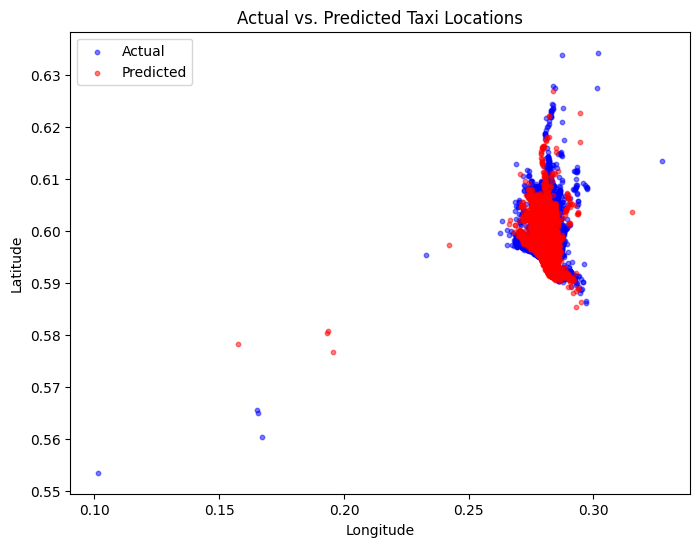

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow as tf

# Define the custom loss function explicitly
custom_objects = {"mse": tf.keras.losses.MeanSquaredError()}

# Load the model with custom objects
model = tf.keras.models.load_model("/content/drive/My Drive/lstm_next_location.h5", custom_objects=custom_objects)

# 🔹 2️⃣ Load Processed Test Data
X_test = np.load("/content/drive/My Drive/X_test.npy")
y_test = np.load("/content/drive/My Drive/y_test.npy")

# 🔹 3️⃣ Make Predictions
y_pred = model.predict(X_test)

# 🔹 4️⃣ Extract Latitude & Longitude
true_lats, true_longs = y_test[:, 0], y_test[:, 1]
pred_lats, pred_longs = y_pred[:, 0], y_pred[:, 1]

# 🔹 5️⃣ Plot Actual vs. Predicted Taxi Locations
plt.figure(figsize=(8, 6))
plt.scatter(true_longs, true_lats, color='blue', alpha=0.5, label="Actual", s=10)
plt.scatter(pred_longs, pred_lats, color='red', alpha=0.5, label="Predicted", s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Actual vs. Predicted Taxi Locations")
plt.legend()
plt.show()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


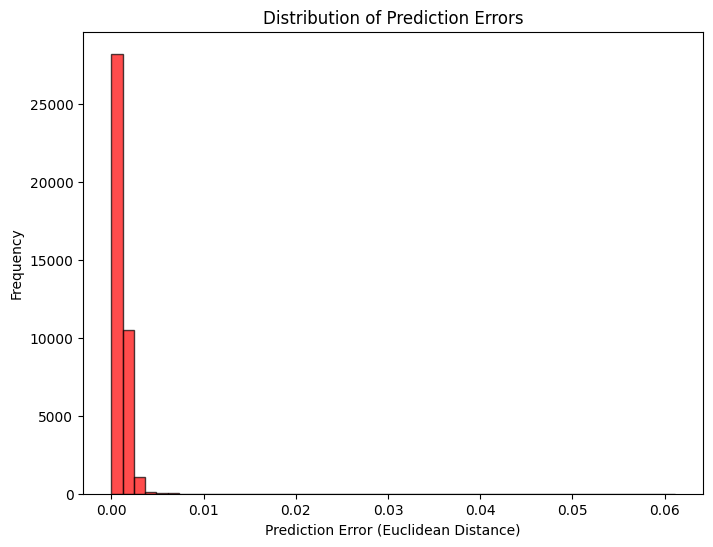

Mean Error: 0.00099
Median Error: 0.00081
Max Error: 0.06112
Min Error: 0.00001


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the custom loss function explicitly
custom_objects = {"mse": tf.keras.losses.MeanSquaredError()}

# Load the model with custom objects
model = tf.keras.models.load_model("/content/drive/My Drive/lstm_next_location.h5", custom_objects=custom_objects)

# 🔹 Load Test Data
X_test = np.load("/content/drive/My Drive/X_test.npy")
y_test = np.load("/content/drive/My Drive/y_test.npy")

# 🔹 Generate Predictions
y_pred = model.predict(X_test)

# 🔹 Save Predictions to Avoid Recomputing
np.save("/content/drive/My Drive/y_pred.npy", y_pred)

# 🔹 Compute Errors (Euclidean Distance)
errors = np.sqrt((y_test[:, 0] - y_pred[:, 0])**2 + (y_test[:, 1] - y_pred[:, 1])**2)

# 🔹 Plot Error Distribution
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, alpha=0.7, color='red', edgecolor='black')
plt.xlabel("Prediction Error (Euclidean Distance)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

# 🔹 Print Basic Error Stats
print(f"Mean Error: {np.mean(errors):.5f}")
print(f"Median Error: {np.median(errors):.5f}")
print(f"Max Error: {np.max(errors):.5f}")
print(f"Min Error: {np.min(errors):.5f}")


In [7]:
import numpy as np
import tensorflow as tf

# Define the custom loss function explicitly
custom_objects = {"mse": tf.keras.losses.MeanSquaredError()}

# Load the model with custom objects
model = tf.keras.models.load_model("/content/drive/My Drive/lstm_next_location.h5", custom_objects=custom_objects)

# 🔹 Load Test Data
X_test = np.load("/content/drive/My Drive/X_test.npy")
y_test = np.load("/content/drive/My Drive/y_test.npy")

# 🔹 Generate Predictions
y_pred = model.predict(X_test)

# 🔹 Save Predictions
np.save("/content/drive/My Drive/y_pred.npy", y_pred)
np.save("/content/drive/My Drive/y_test.npy", y_test)  # Ensure y_test is also saved


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [8]:
import numpy as np
import tensorflow as tf

# 🔹 Load Model with Proper Loss Function
model = tf.keras.models.load_model("/content/drive/My Drive/lstm_next_location.h5",
                                   custom_objects={"mse": tf.keras.losses.MeanSquaredError()})

# 🔹 Load Test Data
X_test = np.load("/content/drive/My Drive/X_test.npy")
y_test = np.load("/content/drive/My Drive/y_test.npy")

# 🔹 Generate Predictions
y_pred = model.predict(X_test)

# 🔹 Save Predictions and Test Labels
np.save("/content/drive/My Drive/y_pred.npy", y_pred)
np.save("/content/drive/My Drive/y_test.npy", y_test)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


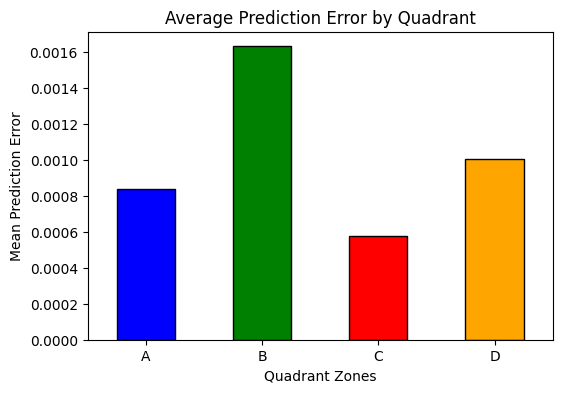

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load test data and predictions
y_test = np.load("/content/drive/My Drive/y_test.npy")
y_pred = np.load("/content/drive/My Drive/y_pred.npy")

# Define Porto city quadrants based on lat/lon ranges
mid_lat = np.median(y_test[:, 0])  # Median latitude
mid_lon = np.median(y_test[:, 1])  # Median longitude

# Compute errors (Euclidean distance between actual and predicted points)
errors = np.sqrt((y_test[:, 0] - y_pred[:, 0])**2 + (y_test[:, 1] - y_pred[:, 1])**2)

# Assign Quadrants: A (Upper Left), B (Upper Right), C (Lower Left), D (Lower Right)
zones = []
for lat, lon in zip(y_test[:, 0], y_test[:, 1]):
    if lat >= mid_lat and lon < mid_lon:
        zones.append("A")
    elif lat >= mid_lat and lon >= mid_lon:
        zones.append("B")
    elif lat < mid_lat and lon < mid_lon:
        zones.append("C")
    else:
        zones.append("D")

# Convert to DataFrame for analysis
df = pd.DataFrame({"Latitude": y_test[:, 0], "Longitude": y_test[:, 1], "Error": errors, "Zone": zones})

# Aggregate mean error per quadrant
zone_errors = df.groupby("Zone")["Error"].mean().reindex(["A", "B", "C", "D"])

# Plot error heatmap per quadrant
plt.figure(figsize=(6, 4))
zone_errors.plot(kind="bar", color=["blue", "green", "red", "orange"], edgecolor="black")
plt.xlabel("Quadrant Zones")
plt.ylabel("Mean Prediction Error")
plt.title("Average Prediction Error by Quadrant")
plt.xticks(rotation=0)
plt.show()


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 🔹 1️⃣ Load Dataset
dataset_path = "/content/drive/My Drive/cleaned_taxi_data.csv"
df = pd.read_csv(dataset_path)

# 🔹 2️⃣ Convert TIMESTAMP to Datetime Format
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])  # No unit needed
 # Assuming UNIX timestamp format

# 🔹 3️⃣ Extract Time-Based Features
df["HOUR"] = df["TIMESTAMP"].dt.hour  # Hour of the day
df["DAY_OF_WEEK"] = df["TIMESTAMP"].dt.dayofweek  # Monday = 0, Sunday = 6
df["MONTH"] = df["TIMESTAMP"].dt.month  # Extract month

# 🔹 4️⃣ Sample 200,000 Data Points for Reporting
sample_size = 200000
df_sampled = df.sample(n=sample_size, random_state=42)

# 🔹 5️⃣ Save Sampled Data for Future Reporting
df_sampled.to_csv("/content/drive/My Drive/taxi_data_sampled.csv", index=False)

# 🔹 6️⃣ Confirm Data Saved Correctly
print("✅ Sampled dataset saved successfully!")
print("Sampled Data Preview:")
print(df_sampled.head())


✅ Sampled dataset saved successfully!
Sampled Data Preview:
                     TRIP_ID  CALL_TYPE  ORIGIN_STAND   TAXI_ID  \
263878   1378163231620000612          1          25.0  20000612   
759541   1387641891620000658          2           0.0  20000658   
1419336  1401013835620000333          1           6.0  20000333   
6946     1372778020620000621          2           0.0  20000621   
1401286  1400688729620000151          0           0.0  20000151   

                  TIMESTAMP  DAY_TYPE  \
263878  2013-09-02 23:07:11         0   
759541  2013-12-21 16:04:51         0   
1419336 2014-05-25 10:30:35         0   
6946    2013-07-02 15:13:40         0   
1401286 2014-05-21 16:12:09         0   

                                                  POLYLINE  HOUR  DAY_OF_WEEK  \
263878   [[-8.617581, 41.146119], [-8.617572, 41.146002...    23            0   
759541   [[-8.60229, 41.142753], [-8.602749, 41.14269],...    16            5   
1419336  [[-8.582391, 41.180589], [-8.582328, 4

In [7]:
import os

# Define the expected file path
file_path = "/content/drive/My Drive/taxi_data_sampled.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("✅ File found:", file_path)
else:
    print("❌ File NOT found. Check if it was saved correctly.")



✅ File found: /content/drive/My Drive/taxi_data_sampled.csv


In [9]:
import pandas as pd

# 🔹 Load Sampled Data
dataset_path = "/content/drive/My Drive/taxi_data_sampled.csv"
df_sampled = pd.read_csv(dataset_path)

# 🔹 Aggregate Taxi Demand by Day & Hour
taxi_demand_report = df_sampled.groupby(["DAY_OF_WEEK", "HOUR"]).size().reset_index(name="Taxi_Count")

# 🔹 Map Numeric Days to Actual Day Names
day_mapping = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
taxi_demand_report["DAY_OF_WEEK"] = taxi_demand_report["DAY_OF_WEEK"].map(day_mapping)

# 🔹 Display Report
print("📊 Taxi Demand Report (Top 10 Rows):")
print(taxi_demand_report.head(10))  # Show first 10 rows

# 🔹 Save Report for Download
output_path = "/content/drive/My Drive/taxi_demand_report.csv"
taxi_demand_report.to_csv(output_path, index=False)
print(f"✅ Report saved at: {output_path}")


📊 Taxi Demand Report (Top 10 Rows):
  DAY_OF_WEEK  HOUR  Taxi_Count
0      Monday     0         475
1      Monday     1         365
2      Monday     2         268
3      Monday     3         289
4      Monday     4         370
5      Monday     5         408
6      Monday     6         626
7      Monday     7        1208
8      Monday     8        1850
9      Monday     9        2072
✅ Report saved at: /content/drive/My Drive/taxi_demand_report.csv


In [12]:
import pandas as pd

# 🔹 Load Sampled Data
dataset_path = "/content/drive/My Drive/taxi_data_sampled.csv"
df_sampled = pd.read_csv(dataset_path)

# 🔹 Aggregate Taxi Demand by Day & Hour
taxi_demand_report = df_sampled.groupby(["DAY_OF_WEEK", "HOUR"]).size().reset_index(name="Taxi_Count")

# 🔹 Map Numeric Days to Actual Day Names
day_mapping = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
taxi_demand_report["DAY_OF_WEEK"] = taxi_demand_report["DAY_OF_WEEK"].map(day_mapping)

# 🔹 Save Report
output_path = "/content/drive/My Drive/taxi_demand_report.csv"
taxi_demand_report.to_csv(output_path, index=False)

print(f"✅ Report saved at: {output_path}")



✅ Report saved at: /content/drive/My Drive/taxi_demand_report.csv


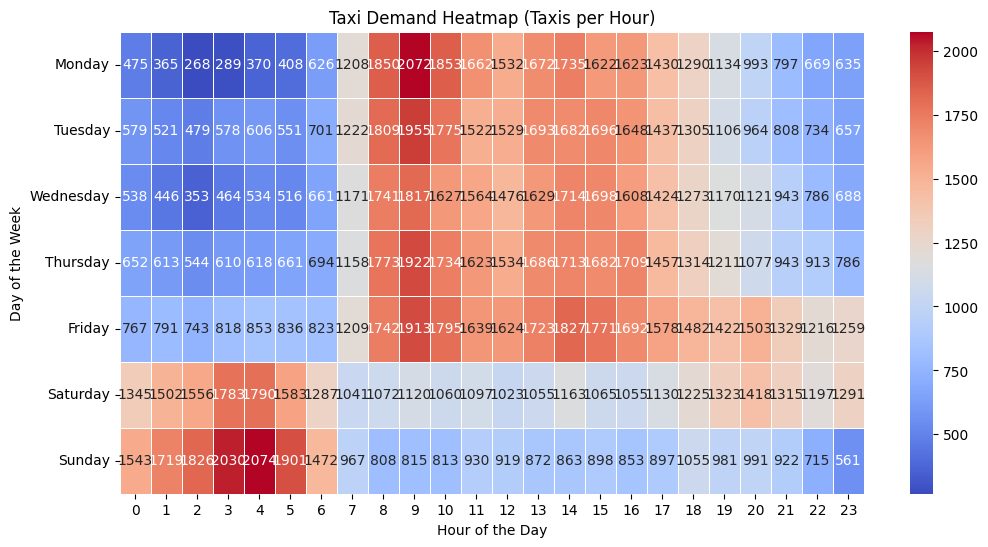

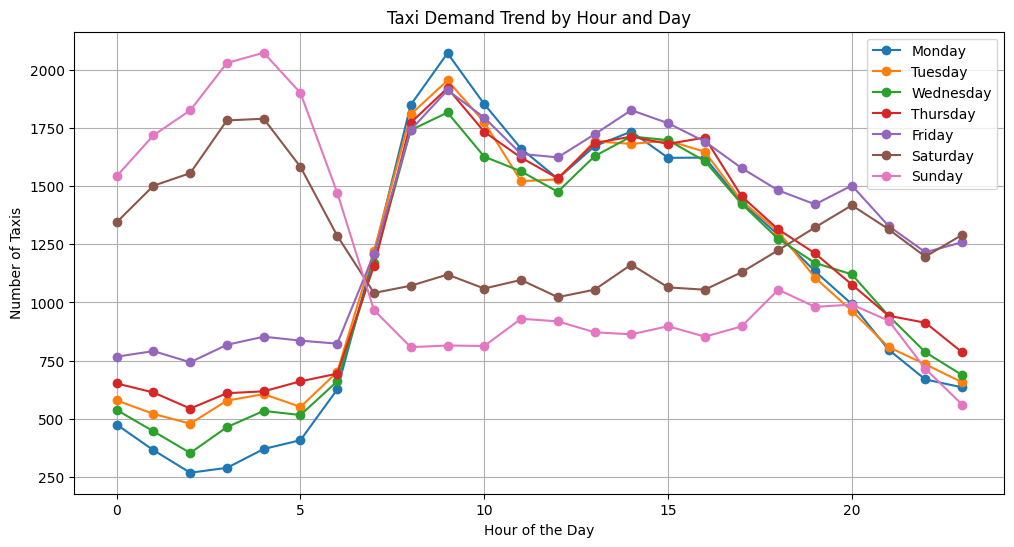

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the correct file path
dataset_path = "/content/drive/My Drive/taxi_demand_report.csv"  # Update if necessary
df_report = pd.read_csv(dataset_path)

# Generate heatmap and line graph
heatmap_data = df_report.pivot(index="DAY_OF_WEEK", columns="HOUR", values="Taxi_Count")
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Taxi Demand Heatmap (Taxis per Hour)")
plt.show()

plt.figure(figsize=(12, 6))
for day in day_order:
    subset = df_report[df_report["DAY_OF_WEEK"] == day]
    plt.plot(subset["HOUR"], subset["Taxi_Count"], marker="o", label=day)

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Taxis")
plt.title("Taxi Demand Trend by Hour and Day")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import pandas as pd

# Load the dataset
file_path_sampled = "/content/drive/My Drive/taxi_data_sampled.csv"
df_sampled = pd.read_csv(file_path_sampled)

# Define Porto city boundary for quadrant division (approximate)
mid_latitude = 41.15  # Approximate midpoint latitude of Porto
mid_longitude = -8.61  # Approximate midpoint longitude of Porto

# Function to assign quadrants based on latitude and longitude
def assign_quadrant(polyline):
    try:
        first_point = eval(polyline)[0]  # Extract first coordinate (longitude, latitude)
        lon, lat = first_point

        if lat >= mid_latitude and lon < mid_longitude:
            return "A"  # Upper Left
        elif lat >= mid_latitude and lon >= mid_longitude:
            return "B"  # Upper Right
        elif lat < mid_latitude and lon < mid_longitude:
            return "C"  # Lower Left
        else:
            return "D"  # Lower Right
    except:
        return None

# Apply function to assign quadrants
df_sampled["Quadrant"] = df_sampled["POLYLINE"].apply(assign_quadrant)

# Filter out rows where quadrant assignment failed
df_sampled = df_sampled.dropna(subset=["Quadrant"])

# Aggregate demand per quadrant, day, and hour
quadrant_demand = df_sampled.groupby(["DAY_OF_WEEK", "HOUR", "Quadrant"]).size().reset_index(name="Taxi_Count")

# Save the report as CSV
quadrant_demand.to_csv("/content/drive/My Drive/quadrant_demand_report.csv", index=False)

print("Quadrant Demand Report successfully generated and saved.")


Quadrant Demand Report successfully generated and saved.


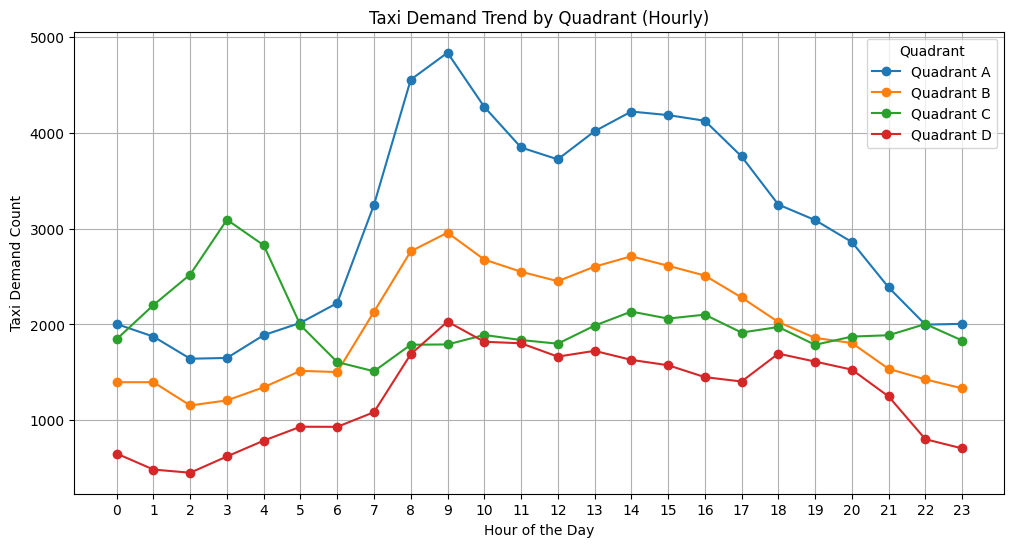

In [23]:
import matplotlib.pyplot as plt

# Create a pivot table for visualization
pivot_table = quadrant_demand.pivot_table(index="HOUR", columns="Quadrant", values="Taxi_Count", aggfunc="sum")

# Plot the demand trend for each quadrant
plt.figure(figsize=(12, 6))
for quadrant in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[quadrant], marker='o', linestyle='-', label=f'Quadrant {quadrant}')

# Customize the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Taxi Demand Count")
plt.title("Taxi Demand Trend by Quadrant (Hourly)")
plt.legend(title="Quadrant")
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are represented

# Show the plot
plt.show()


<ipython-input-25-a1d2ba6f076f>:49: FutureWarning: The provided callable <function mean at 0x7efe6e5620c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data_quadrant = heatmap_data_quadrant.pivot_table(index="DAY_OF_WEEK", columns="HOUR", values="Taxi_Count", aggfunc=np.mean)


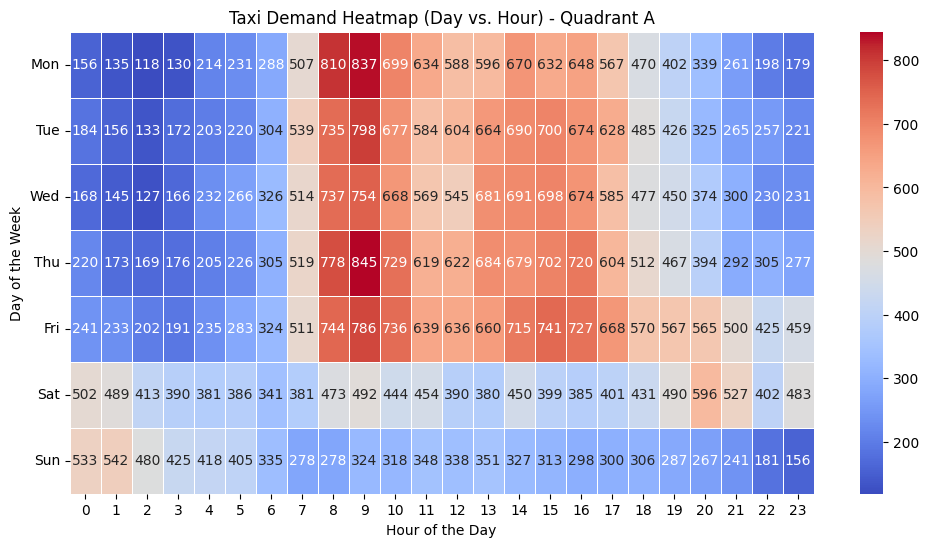

<ipython-input-25-a1d2ba6f076f>:49: FutureWarning: The provided callable <function mean at 0x7efe6e5620c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data_quadrant = heatmap_data_quadrant.pivot_table(index="DAY_OF_WEEK", columns="HOUR", values="Taxi_Count", aggfunc=np.mean)


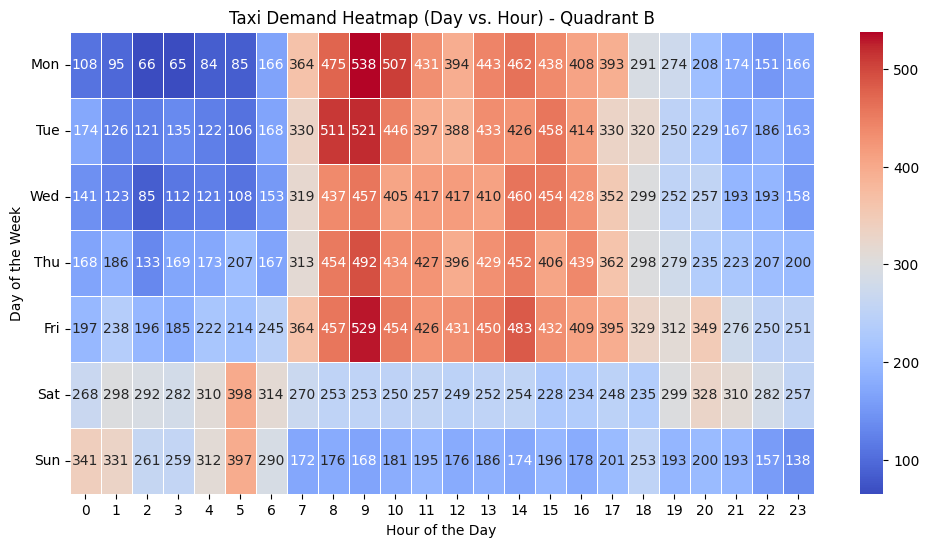

<ipython-input-25-a1d2ba6f076f>:49: FutureWarning: The provided callable <function mean at 0x7efe6e5620c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data_quadrant = heatmap_data_quadrant.pivot_table(index="DAY_OF_WEEK", columns="HOUR", values="Taxi_Count", aggfunc=np.mean)


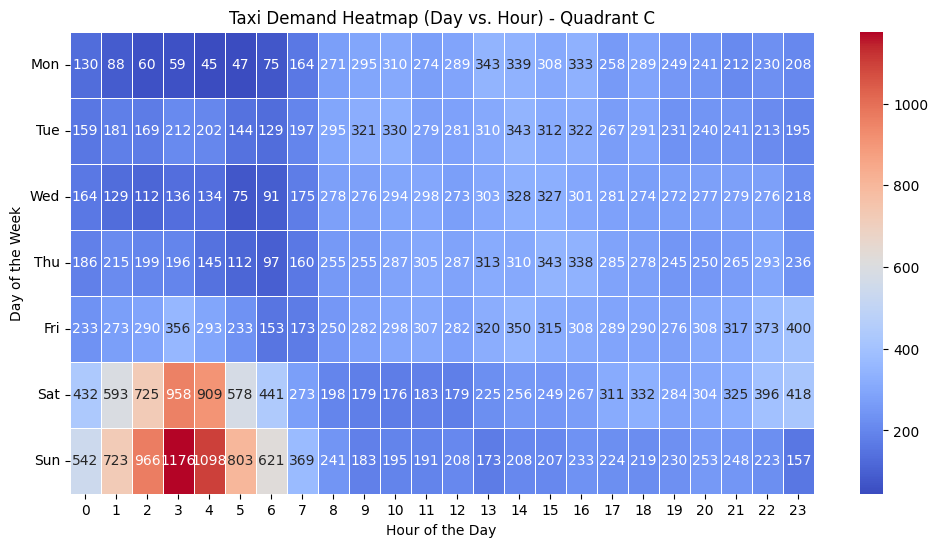

<ipython-input-25-a1d2ba6f076f>:49: FutureWarning: The provided callable <function mean at 0x7efe6e5620c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data_quadrant = heatmap_data_quadrant.pivot_table(index="DAY_OF_WEEK", columns="HOUR", values="Taxi_Count", aggfunc=np.mean)


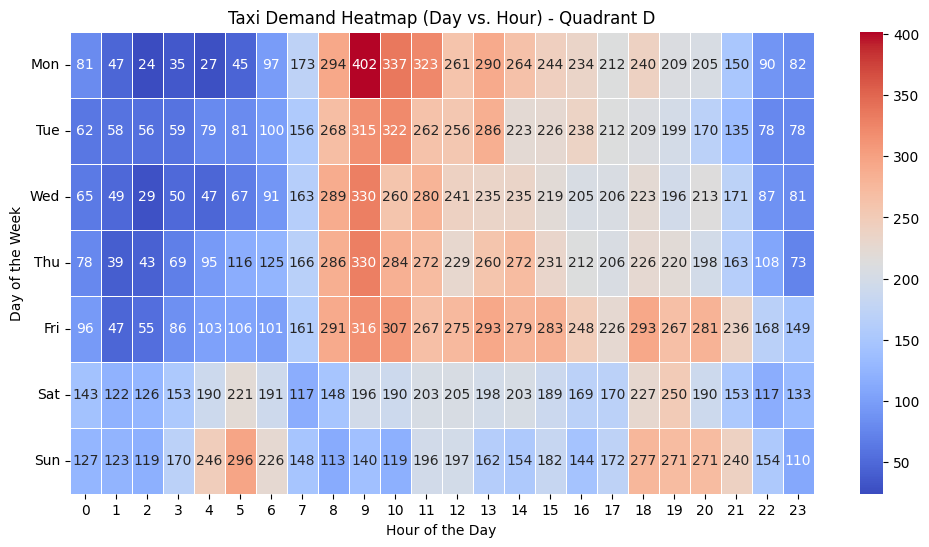

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path_sampled = "/content/drive/My Drive/taxi_data_sampled.csv"
df_sampled = pd.read_csv(file_path_sampled)

# Define Porto city boundary for quadrant division (approximate)
mid_latitude = 41.15  # Approximate midpoint latitude of Porto
mid_longitude = -8.61  # Approximate midpoint longitude of Porto

# Function to assign quadrants based on latitude and longitude
def assign_quadrant(polyline):
    try:
        first_point = eval(polyline)[0]  # Extract first coordinate (longitude, latitude)
        lon, lat = first_point

        if lat >= mid_latitude and lon < mid_longitude:
            return "A"  # Upper Left
        elif lat >= mid_latitude and lon >= mid_longitude:
            return "B"  # Upper Right
        elif lat < mid_latitude and lon < mid_longitude:
            return "C"  # Lower Left
        else:
            return "D"  # Lower Right
    except:
        return None

# Apply function to assign quadrants
df_sampled["Quadrant"] = df_sampled["POLYLINE"].apply(assign_quadrant)

# Filter out rows where quadrant assignment failed
df_sampled = df_sampled.dropna(subset=["Quadrant"])

# Aggregate demand per quadrant, day, and hour
quadrant_demand = df_sampled.groupby(["DAY_OF_WEEK", "HOUR", "Quadrant"]).size().reset_index(name="Taxi_Count")

# Compute average demand per day of the week, hour, and quadrant
avg_weekly_quadrant_demand = quadrant_demand.groupby(["DAY_OF_WEEK", "HOUR", "Quadrant"])["Taxi_Count"].mean().reset_index()

# Generate a heatmap for each quadrant
quadrants = avg_weekly_quadrant_demand["Quadrant"].unique()

for quadrant in quadrants:
    # Filter data for the specific quadrant
    heatmap_data_quadrant = avg_weekly_quadrant_demand[avg_weekly_quadrant_demand["Quadrant"] == quadrant]
    heatmap_data_quadrant = heatmap_data_quadrant.pivot_table(index="DAY_OF_WEEK", columns="HOUR", values="Taxi_Count", aggfunc=np.mean)

    # Plot the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data_quadrant, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

    # Customize the plot
    plt.xlabel("Hour of the Day")
    plt.ylabel("Day of the Week")
    plt.title(f"Taxi Demand Heatmap (Day vs. Hour) - Quadrant {quadrant}")
    plt.yticks(ticks=np.arange(7) + 0.5, labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)

    # Show the plot
    plt.show()
